<a href="https://colab.research.google.com/github/tpemartin/111-1-econDV/blob/main/week4exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# download data ---------
googlesheets4::gs4_deauth()
googlesheets4::read_sheet(
  ss="https://docs.google.com/spreadsheets/d/1lkts4hLkrAFAobONFXiEjgDnuUmXKci6YF--vg1pC1s/edit#gid=1655384974",
  sheet="data 4"
) -> data4

✔ Reading from Exercise Data.

✔ Range ''data 4''.



In [6]:
# Plot constructor -----------
Plot <- function(data) {
  library(ggplot2)
  plot = new.env()
  plot$data=data
  plot$ggplot=NULL
  plot$geoms=NULL
  plot$make=function(){
    plot$ggplot+plot$geoms
  }
  plot$save=function(){
    saveRDS(plot, filename)
    message(paste("The plot is saved at ", filename))
  }
  return(plot)
}

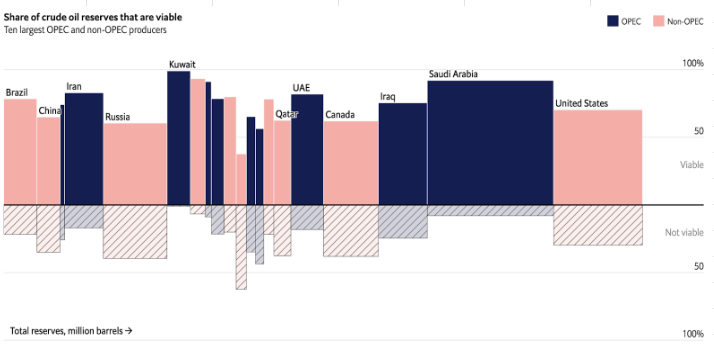

In [8]:
# Initialize plot object -----------
plot=Plot(data4)
head(plot$data)

country,shareProfitable,shareNonProfitable,Volumn,isOPEC
<chr>,<dbl>,<dbl>,<dbl>,<lgl>
a,0.2788647,0.7211353,10293,TRUE
b,0.1893815,0.8106185,29384,TRUE
c,0.5997199,0.4002801,2923,FALSE
d,0.6827120,0.3172880,19280,TRUE
e,0.6830709,0.3169291,5029,FALSE
f,0.7713459,0.2286541,1299,FALSE


In [9]:
# define ggplot property
plot$ggplot=ggplot(data=plot$data, aes(x=country, y=shareProfitable))

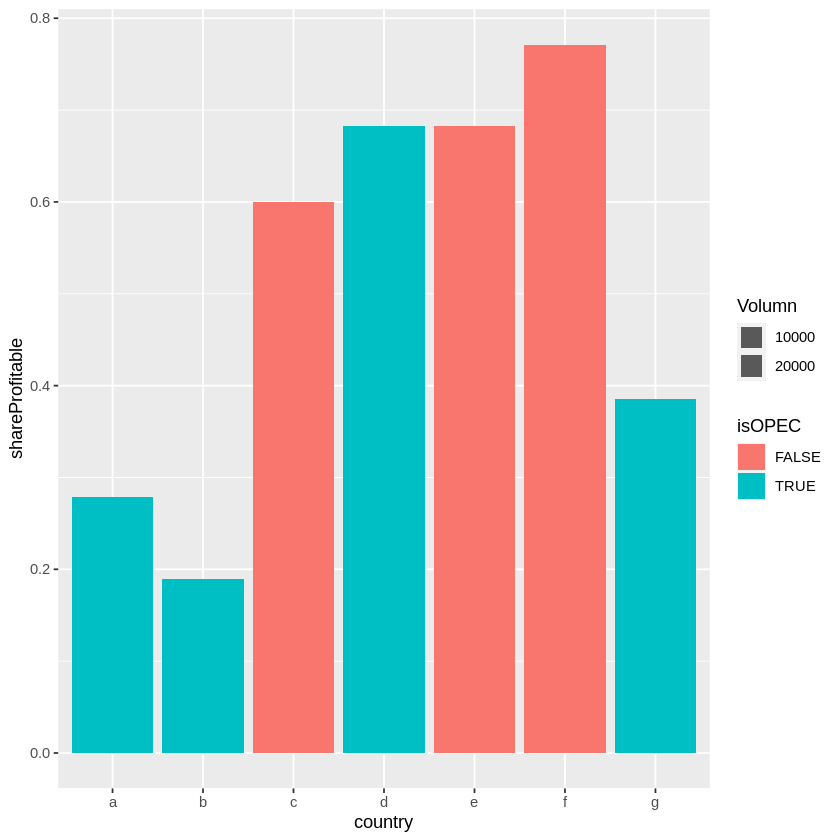

In [14]:
# define geoms property
plot$geoms = list(
  geom_col(
    aes(fill=isOPEC, size=Volumn)
  )
)
# make the plot
plot$make() 

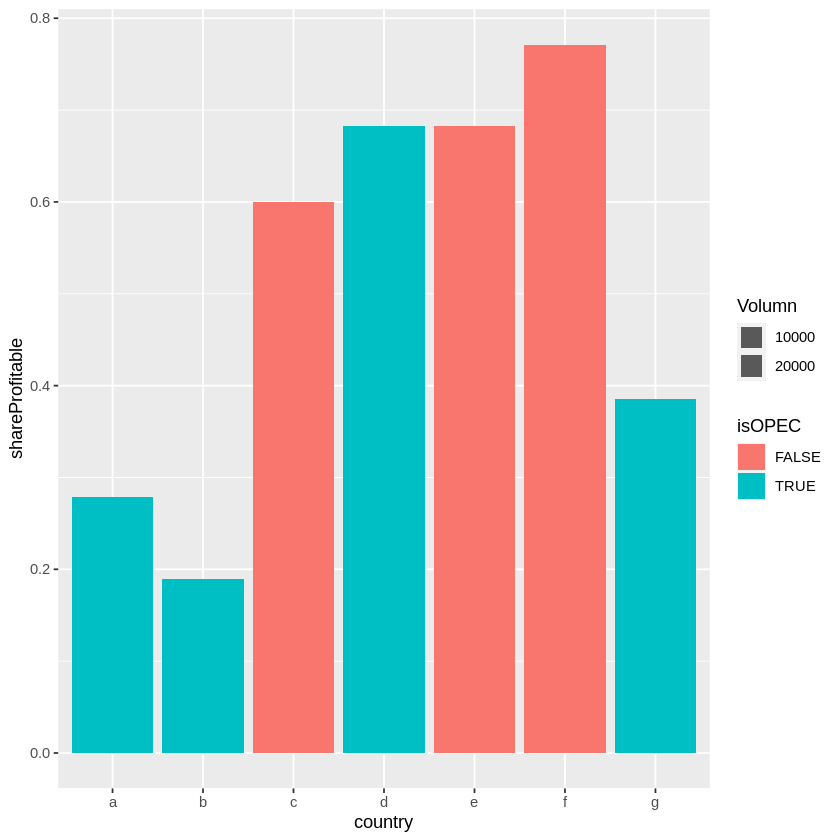

In [13]:
plot$make()

# Tiles

Unfortunately, size in `geom_col` is about the size of stroke lines. A better candidate geom is `geom_tile`.

***
x,y the center point of the bar
width, height  of the bar

***

For each new bar, it is the **accummulated** width of bars plus $1/2$ of its own width


In [36]:
library(dplyr)
plot$data |>
  arrange(
    desc(Volumn)) |>
  mutate(
      halfVolumn = Volumn/2, # half of width
      accVolumn = lag(cumsum(Volumn)),
      accVolumn = dplyr::if_else(is.na(accVolumn),0, accVolumn), # set first acc to 0
      x = accVolumn + halfVolumn,
      yPos = shareProfitable/2,
      yNeg = -shareNonProfitable/2
    ) -> plot$data2

  head(plot$data2)

country,shareProfitable,shareNonProfitable,Volumn,isOPEC,halfVolumn,accVolumn,x,yPos,yNeg
<chr>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
b,0.1893815,0.8106185,29384,TRUE,14692.0,0,14692.0,0.09469077,-0.4053092
d,0.6827120,0.3172880,19280,TRUE,9640.0,29384,39024.0,0.34135600,-0.1586440
g,0.3852629,0.6147371,19220,TRUE,9610.0,48664,58274.0,0.19263144,-0.3073686
a,0.2788647,0.7211353,10293,TRUE,5146.5,67884,73030.5,0.13943234,-0.3605677
e,0.6830709,0.3169291,5029,FALSE,2514.5,78177,80691.5,0.34153547,-0.1584645
c,0.5997199,0.4002801,2923,FALSE,1461.5,83206,84667.5,0.29985993,-0.2001401


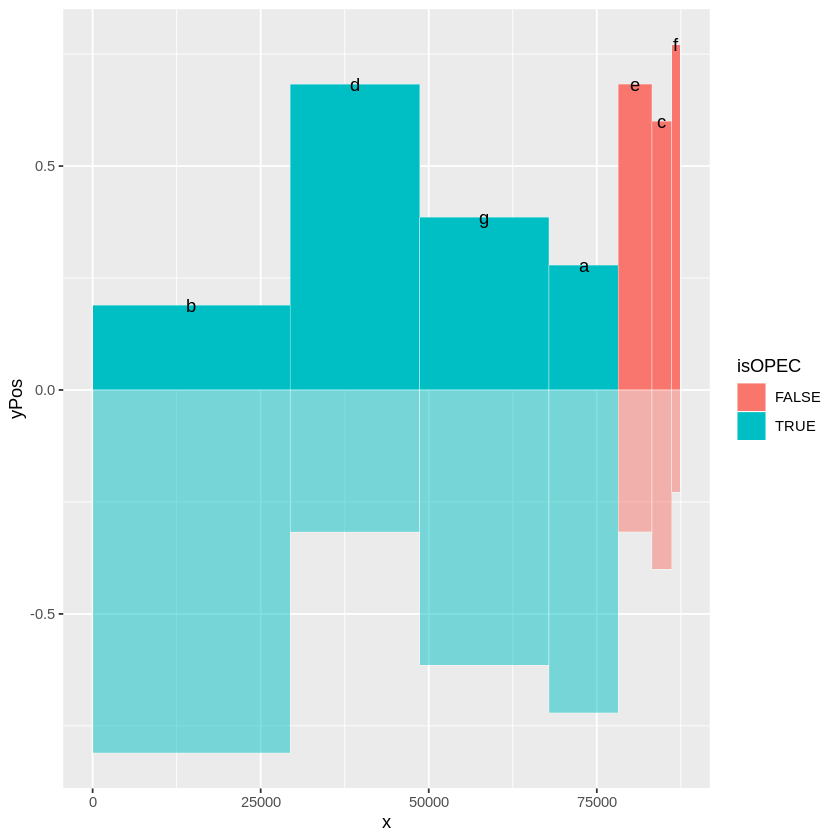

In [39]:
# set up geoms property -----------
plot$geoms = list(
  geom_tile(
    mapping = aes(
      x=x,y=yPos,
      width=Volumn,
      height=shareProfitable,
      fill=isOPEC),
    linetype='solid',
    color="white"),
  geom_tile(
    mapping = aes(
      x=x,y=yNeg,
      width=Volumn,
      height=shareNonProfitable,
      fill=isOPEC),
    linetype='solid',
    color="white",
    alpha=0.5),
  geom_text(
    mapping = aes(
      x=x, y=shareProfitable, label=country
    )
  )
)
plot$ggplot <- ggplot(data=plot$data2)
plot$make()

# Complete code

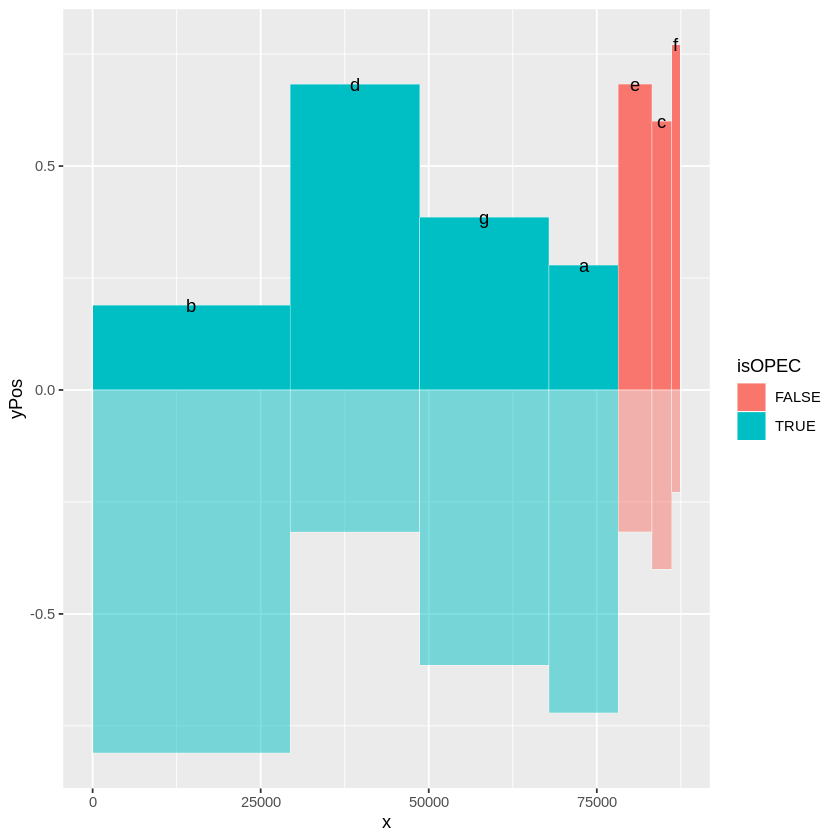

In [40]:
# complete code ------
plot=Plot(data4)
plot$data2 = {
  plot$data |>
  arrange(
    desc(Volumn)) |>
  mutate(
      halfVolumn = Volumn/2,
      accVolumn = lag(cumsum(Volumn)),
      accVolumn = dplyr::if_else(is.na(accVolumn),0, accVolumn),
      x = accVolumn + halfVolumn,
      yPos = shareProfitable/2,
      yNeg = -shareNonProfitable/2
    )
}
plot$ggplot = ggplot(data=plot$data2())
plot$geoms = list(
  geom_tile(
    mapping = aes(
      x=x,y=yPos,width=Volumn,height=shareProfitable,fill=isOPEC),
      linetype='solid',
      color="white"),
  geom_tile(
    mapping = aes(
      x=x,y=yNeg,width=Volumn,height=shareNonProfitable,fill=isOPEC),
      linetype='solid',
      color="white",
      alpha=0.5),
  geom_text(
    mapping = aes(
      x=x, y=shareProfitable, label=country
    )
  )
)
plot$make()

# ggpattern

  * <https://cran.r-project.org/web/packages/ggpattern/vignettes/patterns-stripes.html>




In [ ]:
# ggpattern ------------
install.packages("ggpattern")

In [ ]:
library(ggpattern)
plot$geoms[[2]] <-
  ggpattern::geom_tile_pattern(
      mapping = aes(
        x=x,y=yNeg,width=Volumn,height=shareNonProfitable,fill=isOPEC),
      linetype='solid',
      color="white",
      alpha=0.5,
      pattern="stripe"
    )
plot$make()